# COMP 488-386: Computational Neuroscience

## Receptive Fields

By: Andrew Phillips and Metin Aksu

In [1]:
from os.path import join, split, exists
import math

import numpy as np
import pylab as py
from scipy import signal
from PIL import Image
import cv2

%matplotlib inline

In [2]:
def image_to_gray(image_path):
    gray_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    path_parts = split(image_path)
    gray_name = 'gray_{}'.format(path_parts[-1])
    gray_path = join(*(path_parts[:-1]), gray_name)
    cv2.imwrite(gray_path, gray_image)
    return Image.open(gray_path)

def image_to_array(image, stdize=True):
    if isinstance(image, str) and exists(image): image = Image.open(image)
    img_array = np.asarray(image)
    if stdize: img_array = stdize_array(img_array)
    return img_array

def stdize_array(img_array):
    img_array.astype(float)
    mean = np.mean(img_array)
    std = np.std(img_array)
    width = img_array.shape[0]
    height = img_array.shape[1]
    new_array = np.empty(shape=(width, height))
        
    for x in range(width):
            
        for y in range(height):
            new_array[x][y] = img_array[x][y] - mean * 1 / std
    return new_array
    
def array_to_image(array):
    return Image.fromarray(array)

def receptive_field(func, size=(16, 16)):
    field = np.zeros(shape=size)
    width = size[0]
    height = size[1]
    
    for x in range(width):
        
        for y in range(height):
            field[x][y] = func(x - width / 2, y - height / 2)
    return field

def gaussian_2d(x, y, sigma, k=1):
    return (1.0/(1*math.pi*(sigma**2)*k**2))*math.exp(-(1.0/(2*(sigma**2)*k**2))*(x**2 + y**2))

def gaussian_2d_diff(x, y, sigma1=0, sigma2=0, k=1): 
    return gaussian_2d(x, y, sigma1, k=1) - gaussian_2d(x, y, sigma2, k=k)

def rgc_receptive_field(image):
    rgc = signal.convolve(image, receptive_field(lambda x, y: gaussian_2d_diff(x, y, 1.6, 3.6, 1)))
    return rgc

def gabor_filter(x, y, sigma_x, sigma_y, f_x, f_y):
    # shamelessly ripped }:)
    return (1 / (2 * math.pi * sigma_x * sigma_y)) \
        * math.exp(-0.5 * (((x * x) / (sigma_x * sigma_x)) \
                            + ((y * y)/(sigma_y * sigma_y)))) \
        * math.cos(2 * math.pi * f_x * x + f_y * y)

def sc_receptive_field(image):
    return signal.convolve(image, receptive_field(lambda x, y: gabor_filter(x, y, 4, 7, 0.1, 0)))

def show_image(image, size=(25, 25)):
    py.figure(figsize=size)  # sizing
    py.subplot(3, 1, 1)  # scaling & positioning
    py.imshow(image, cmap=py.cm.Greys_r)
    return

def show_array(array, size=(25, 25)):
    image = array_to_image(array)
    show_image(image, size)
    return

In [3]:
image_names = ['snow_path.jpg', 'city_view.jpg', 'shrimp_under_water.jpg']
gray_images = [image_to_gray(join('res', im)) for im in image_names]


**Original images**

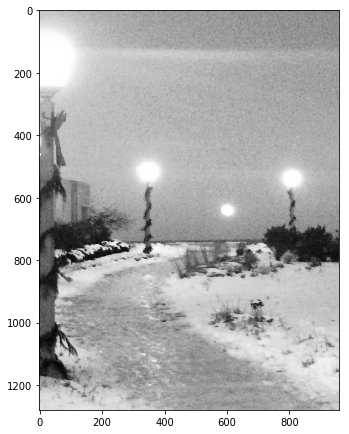

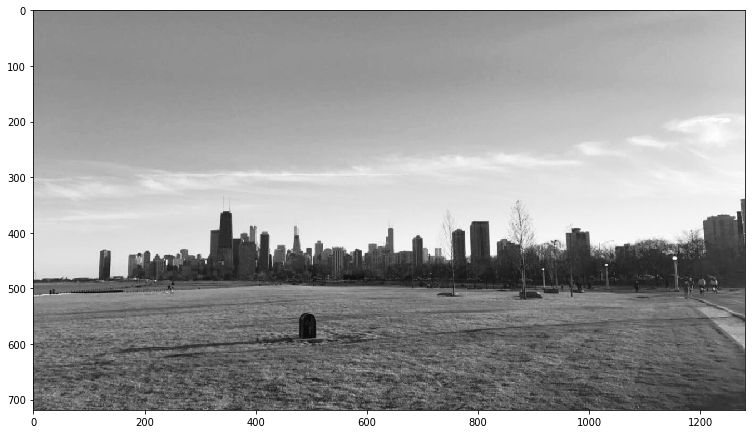

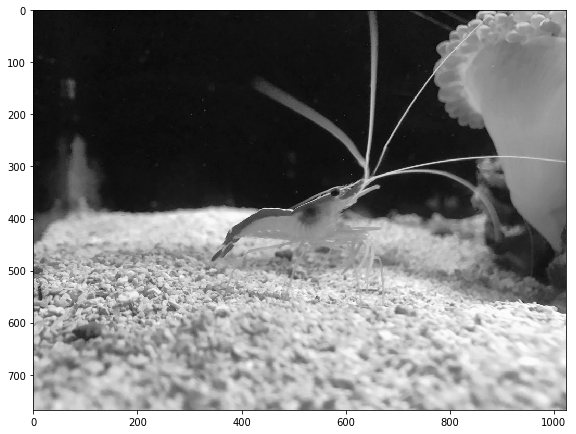

In [4]:
for img in gray_images: show_image(img)



**Retinal Ganglion Cell receptor field**

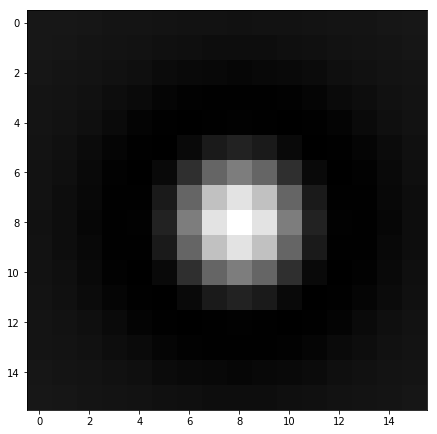

In [5]:
show_image(receptive_field(lambda x, y: gaussian_2d_diff(x, y, 1.6, 3.6, 1)))  # only works properly with given params

**Images with RGC RF applied**

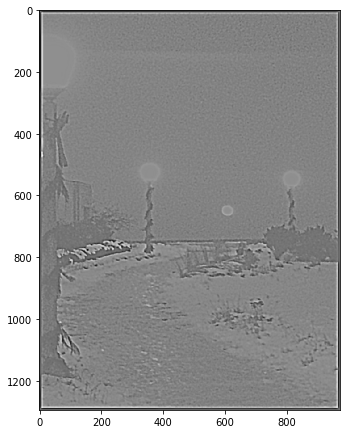

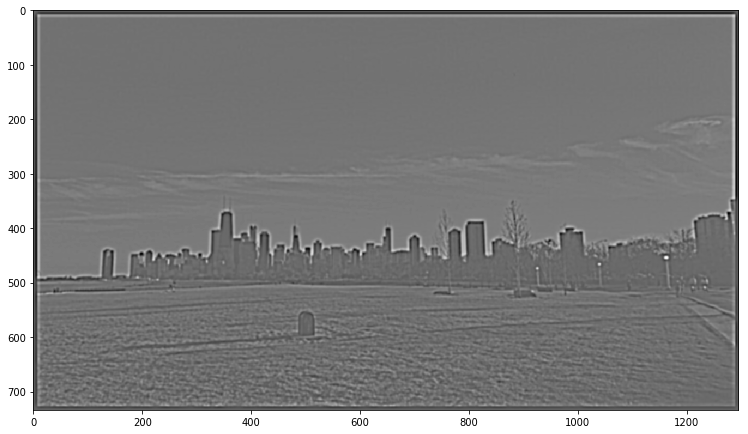

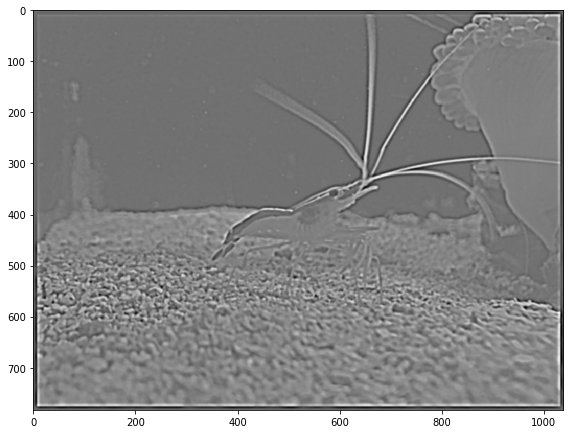

In [6]:
for im in gray_images: show_image(rgc_receptive_field(im))

**Simple Cell receptive field**

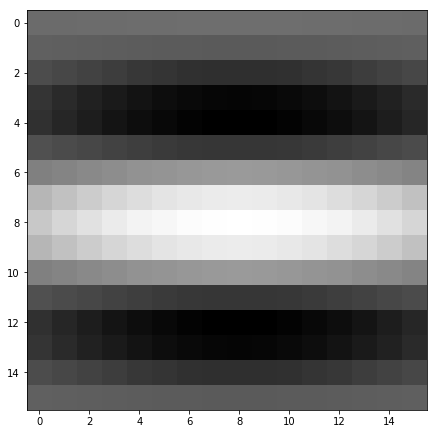

In [7]:
show_image(receptive_field(lambda x, y: gabor_filter(x, y, 4, 7, 0.1, 0)))

**Images with SC RF applied**

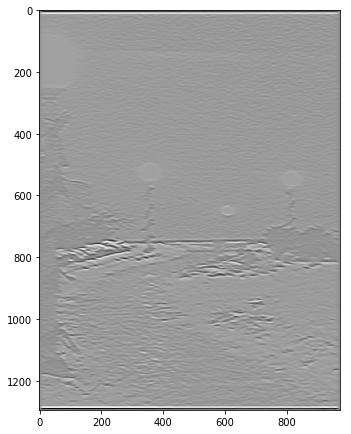

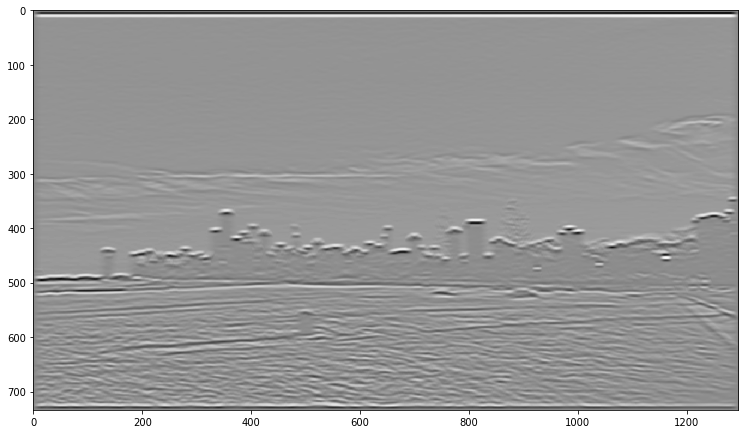

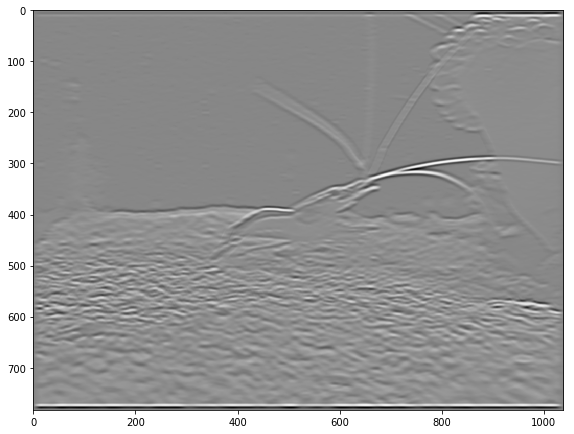

In [8]:
for im in gray_images: show_image(sc_receptive_field(im))